# **Working on kaggle credit card fraud detection data using Pycaret**

# **Install Pycaret**
# After successfully installing restart your kernal

In [18]:
! pip install pycaret

     |████████████████████████████████| 194kB 4.9MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
     |████████████████████████████████| 1.6MB 10.3MB/s 
     |████████████████████████████████| 389kB 32.2MB/s 
     |████████████████████████████████| 1.2MB 33.6MB/s 
     |████████████████████████████████| 3.0MB 46.1MB/s 
     |████████████████████████████████| 266kB 48.6MB/s 
     |████████████████████████████████| 63.9MB 61kB/s 
     |████████████████████████████████| 133kB 51.8MB/s 
     |████████████████████████████████| 7.0MB 48.0MB/s 
     |████████████████████████████████| 102kB 13.4MB/s 
     |████████████████████████████████| 81kB 11.5MB/s 
     |████████████████████████████████| 235kB 50.1MB/s 
     |████████████████████████████████| 552kB 47.4MB/s 
     |████████████████████████████████| 6.2MB 52.2MB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
     |████████████████████████████████| 614kB 45.2MB/s 
     |████████████████████████████████| 2.1MB 41.1MB/s 

# **Get kaggle data to your drive by following below steps**

In [0]:
! pip install -q kaggle

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"ram1819","key":"3ca1609a0fe14f247b792bb5a4eb4c37"}'}

In [0]:
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge           COVID-19 Open Research Dataset Challenge (CORD-19)    2GB  2020-04-25 00:03:33          59491  
divyansh22/us-border-crossing-data                          US Border Crossing Data                               2MB  2020-04-19 09:38:10            413  
roche-data-science-coalition/uncover                        UNCOVER COVID-19 Challenge                          142MB  2020-04-29 22:47:23           6138  
baltacifatih/turkish-lira-banknote-dataset                  Turkish Lira Banknote Dataset                         3GB  2020-04-19 14:48:39             56  
doaaalsenani/usa-cers-dataset                               US C

In [7]:
! kaggle datasets download -d 'mlg-ulb/creditcardfraud'

creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:

!cd drive

In [10]:
!mkdir creditcradfraud

mkdir: cannot create directory ‘creditcradfraud’: File exists


In [11]:
!unzip /content/creditcardfraud.zip -d /content

Archive:  /content/creditcardfraud.zip
replace /content/creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# **Import Pandas and read the credit card fraud detection file you downloaded**

In [0]:
import pandas as pd

In [0]:
train=pd.read_csv('/content/creditcard.csv')

In [14]:
train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# **Checking Class Imbalance**

In [15]:
len(train[train['Class']==0]),len(train[train['Class']==1])

(284315, 492)

# **Bar plot to represent how classes are imbalanced**

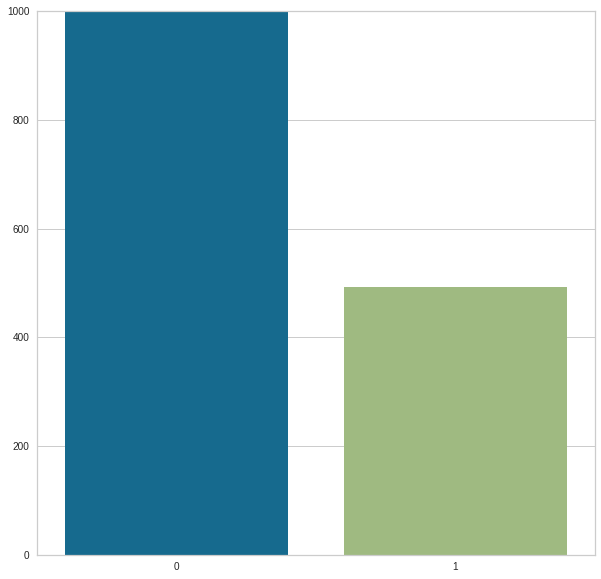

In [57]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.ylim(0,1000)
a=[0,1]
sb.barplot(x=a,y=(len(train[train['Class']==0]),len(train[train['Class']==1])))

# **From pycaret.classification Import all**
# Importing pycaret.classification as our task is a classification task i.e: we going to predict transcation is fraud or not

In [0]:
from pycaret.classification import *

# **There is a method called setup in pycaret where we give input features and output feature as target**
# There are also so many features available that we can give inside the setup like we can also do anomaly detection by just giving setup('anomaly')

# while running the below command it asks you to verify all the data type are correct or not. If correct click enter else you can change.

# And lastly, it asks you how much data needs to use for training. If you would like to use 70% of data for training give 0.70 

In [17]:
setup=setup(data=train,target='Class')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,3948
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(284807, 31)"
4,Missing Values,False
5,Numeric Features,30
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [18]:
setup

(            Time         V1         V2  ...       V27       V28  Amount
 0            0.0  -1.359807  -0.072781  ...  0.133558 -0.021053  149.62
 1            0.0   1.191857   0.266151  ... -0.008983  0.014724    2.69
 2            1.0  -1.358354  -1.340163  ... -0.055353 -0.059752  378.66
 3            1.0  -0.966272  -0.185226  ...  0.062723  0.061458  123.50
 4            2.0  -1.158233   0.877737  ...  0.219422  0.215153   69.99
 ...          ...        ...        ...  ...       ...       ...     ...
 284802  172786.0 -11.881118  10.071785  ...  0.943651  0.823731    0.77
 284803  172787.0  -0.732789  -0.055080  ...  0.068472 -0.053527   24.79
 284804  172788.0   1.919565  -0.301254  ...  0.004455 -0.026561   67.88
 284805  172788.0  -0.240440   0.530483  ...  0.108821  0.104533   10.00
 284806  172792.0  -0.533413  -0.189733  ... -0.002415  0.013649  217.00
 
 [284807 rows x 30 columns], 0         0
 1         0
 2         0
 3         0
 4         0
          ..
 284802    0
 28

**Comapre models is an interactive feature while using pycaret. Where it fits our data on all the algorithms and gives you the scores of accuracy, AUC, Recall, Precision, F1-score and Kappa scores. So that you can compare all the model at a time and choose for the metrics depending on your data**

In [19]:
compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.999600,0.977000,0.771300,0.967400,0.856100,0.855900
1,Random Forest Classifier,0.999500,0.920600,0.725900,0.950200,0.820400,0.820100
2,Extra Trees Classifier,0.999500,0.947900,0.730000,0.969200,0.831600,0.831300
3,Extreme Gradient Boosting,0.999500,0.973400,0.738300,0.943500,0.827300,0.827000
4,Linear Discriminant Analysis,0.999300,0.980100,0.742600,0.836500,0.785200,0.784800
5,Ada Boost Classifier,0.999100,0.969700,0.613900,0.823400,0.699400,0.698900
6,Gradient Boosting Classifier,0.999000,0.756200,0.539300,0.808400,0.646300,0.645800
7,Logistic Regression,0.998900,0.905700,0.651400,0.702300,0.674700,0.674200
8,Decision Tree Classifier,0.998800,0.844100,0.688900,0.655400,0.670500,0.669900
9,Ridge Classifier,0.998800,0.000000,0.419000,0.818700,0.547500,0.547000


**Creating a model after comparing all the models**

In [33]:
xg_model=create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9997,0.9725,0.8333,1.0000,0.9091,0.9089
1,0.9995,0.9849,0.7500,0.9474,0.8372,0.8370
2,0.9993,0.9306,0.6250,0.9375,0.7500,0.7497
3,0.9996,0.9636,0.8000,1.0000,0.8889,0.8887
4,0.9994,0.9559,0.7500,0.8571,0.8000,0.7997
5,0.9995,0.9861,0.7500,0.9474,0.8372,0.8370
6,0.9995,0.9917,0.7917,0.9048,0.8444,0.8442
7,0.9996,0.9994,0.8333,0.9091,0.8696,0.8694
8,0.9994,0.9834,0.6667,0.9412,0.7805,0.7802
9,0.9996,0.9932,0.7500,1.0000,0.8571,0.8569


**We can also tune our model easily here**

In [34]:
tuned_model=tune_model('xgboost', optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9995,0.9892,0.7083,1.0000,0.8293,0.8290
1,0.9996,0.9710,0.7500,1.0000,0.8571,0.8569
2,0.9993,0.9278,0.5833,1.0000,0.7368,0.7365
3,0.9997,0.9861,0.8400,1.0000,0.9130,0.9129
4,0.9994,0.9747,0.7500,0.8571,0.8000,0.7997
5,0.9996,0.9791,0.7917,0.9500,0.8636,0.8634
6,0.9996,0.9837,0.7500,1.0000,0.8571,0.8569
7,0.9996,0.9989,0.8750,0.8750,0.8750,0.8748
8,0.9994,0.9893,0.6667,0.9412,0.7805,0.7802
9,0.9996,0.9897,0.7917,1.0000,0.8837,0.8835


**Plot RoC curve without using any matplotlib or seaborn libraries**

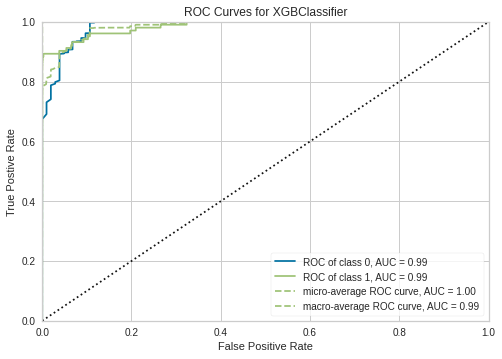

In [35]:
plot_model(tuned_model)

**Ploting precision and recall curves**

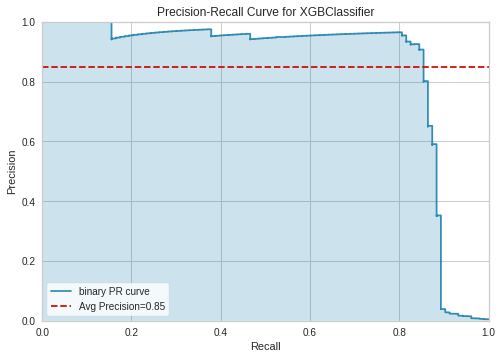

In [36]:
plot_model(tuned_model,'pr')

**Check for confusion matrix**

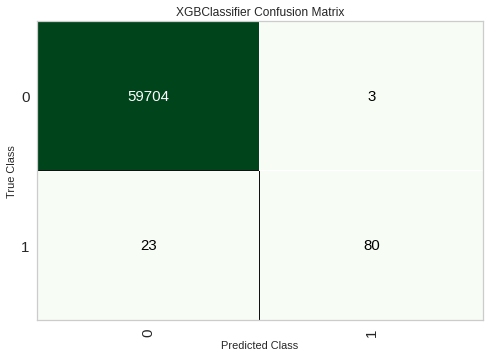

In [37]:
plot_model(tuned_model,'confusion_matrix')

**Plot classification report**

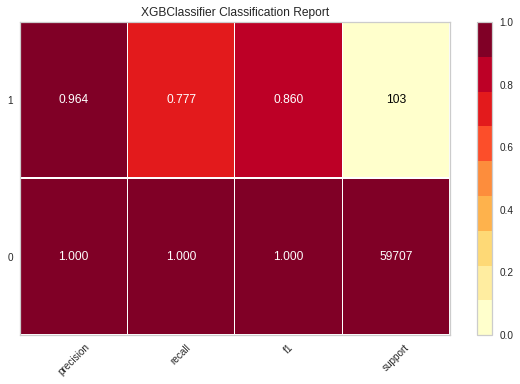

In [39]:
plot_model(tuned_model,'class_report')

**Plot to check how classes are classified using boundary plot**

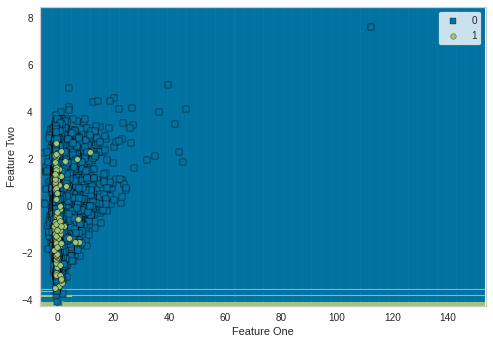

In [38]:
plot_model(tuned_model,'boundary')

**Plot to know feature importance**

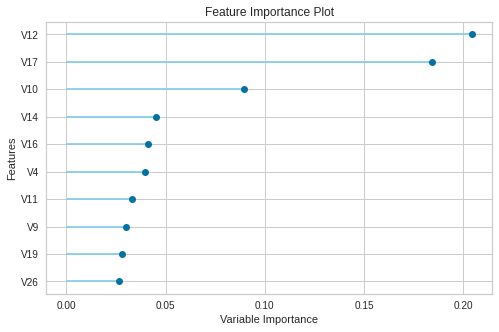

In [40]:
plot_model(tuned_model,'feature')

**Predicting our final model**

In [41]:
predict_model(tuned_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.9996,0.9852,0.7767,0.9639,0.8602,0.86


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Label,Score
0,42498.0,-0.883382,-0.690010,2.163594,-2.632381,-0.861115,0.377266,-0.848682,0.537585,-2.151264,0.970800,1.130193,-1.296265,-1.430488,-0.068819,0.272343,-0.322251,0.570395,0.210019,-1.390607,-0.247911,0.053433,0.451799,-0.145249,-0.347784,0.196594,-0.122698,0.316247,0.113646,26.80,0,0,0.0
1,166993.0,-0.460847,1.064857,0.147026,-0.775038,0.279520,-0.772715,0.838485,-0.058321,0.138682,0.297321,0.792820,0.433034,-0.929129,0.344829,-0.941576,0.013937,-0.547065,-0.297942,0.082338,0.007370,-0.201503,-0.511339,0.107736,-0.017326,-0.546571,0.102187,0.075133,0.141060,6.99,0,0,0.0
2,159145.0,-0.636667,-0.172244,1.685577,-2.259165,-0.186685,-0.742261,0.431282,-0.626176,-0.211220,0.499115,-0.907103,-1.155477,-0.190201,-1.103234,-0.428059,1.142572,-0.355885,-1.122213,-0.159240,-0.007828,0.304516,1.121189,-0.414329,0.081692,-0.120757,-0.278484,-0.599073,-0.269648,29.00,0,0,0.0
3,115263.0,-0.599884,1.494184,-0.468230,1.016233,0.146515,-0.655344,1.333992,0.083142,-0.667511,-0.157643,-1.288687,-0.185383,-0.619083,0.827962,-0.265561,-1.001365,0.344823,-0.279082,0.739881,-0.099828,0.131728,0.535421,-0.124670,-0.014714,-0.095108,-0.441020,0.224673,0.166486,89.90,0,0,0.0
4,9274.0,-2.176084,0.485672,1.178898,-0.081746,0.329833,-0.178999,-0.191529,-0.017327,3.139561,1.098551,1.895141,-1.583706,0.719968,0.530158,-2.630835,-0.661644,0.626959,-0.371914,-0.666223,-0.009318,-0.326254,0.363498,-0.048757,0.213171,-0.952755,0.120050,0.235939,0.711928,0.01,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59805,74568.0,1.424300,-1.194497,0.480108,-1.418907,-1.610295,-0.410013,-1.246071,0.152667,-1.774380,1.634631,1.233399,-1.259332,-1.942205,0.386648,0.354896,-0.450076,0.742341,0.218740,-0.373947,-0.510919,-0.150195,-0.144564,0.107641,0.137898,0.180602,-0.198478,0.028592,0.003870,10.00,0,0,0.0
59806,61557.0,1.170513,0.062023,0.033202,0.843572,-0.043037,-0.168322,0.012165,0.071977,0.016619,0.187181,0.372549,-0.133312,-1.419418,0.834172,0.516005,0.670538,-0.918268,0.632023,0.307666,-0.117906,-0.174365,-0.697079,-0.079212,-0.575243,0.471705,-0.528119,-0.003466,0.011820,44.97,0,0,0.0
59807,83257.0,-0.525999,0.985758,1.161727,-0.223449,0.321127,-0.446328,0.642080,-0.027015,-0.205612,-0.187029,-1.208371,-0.537922,-0.214736,0.134796,0.964681,0.451641,-0.683317,-0.035567,0.339425,0.080804,-0.272323,-0.779461,-0.068634,-0.486715,-0.095665,0.113388,0.129786,0.109337,5.49,0,0,0.0
59808,77060.0,-2.143547,1.885899,0.618333,1.335496,-0.501334,-0.642963,0.398371,0.120570,-0.142548,1.299413,-0.216941,0.386660,0.972720,0.100168,1.723161,-0.644879,0.262118,0.043710,1.358507,0.262325,-0.058408,0.288040,0.017470,0.423393,0.760749,-0.042588,-0.014666,0.303901,31.00,0,0,0.0


In [0]:
final_model=finalize_model(tuned_model)

In [43]:
final_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=90,
              min_child_weight=1, missing=None, n_estimators=800, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=3948,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=0)

**Interpret model similar to feature importance plot but gives shape values**

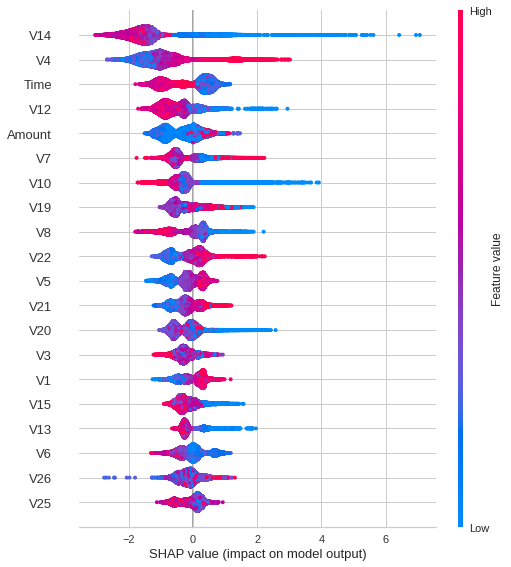

In [45]:
interpret_model(tuned_model)

**Correlation plot**

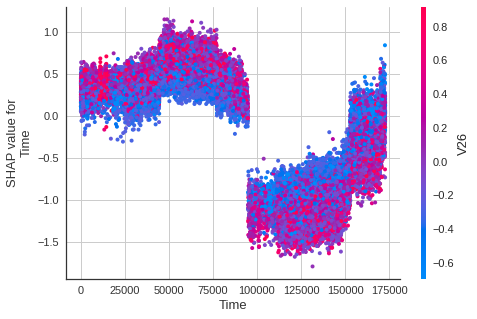

In [46]:
interpret_model(tuned_model,plot='correlation')

**Reason plot with 10 observations**

In [49]:
interpret_model(tuned_model,plot='reason',observation=10)

**Saving a model it not only saves our final model and also saves entire transformation pipeline**

In [50]:
save_model(tuned_model,'xg_boost')

Transformation Pipeline and Model Succesfully Saved


In [52]:
load=load_model('xg_boost')

Transformation Pipeline and Model Sucessfully Loaded


In [53]:
load

[Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 numeric_strategy='mean',
                                 target_variable=None)),
                 ('new_levels1',
                  New_Catagorical_Leve...
                 ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                 ('P_transform', Empty()), ('pt_target', Empty()),
                 ('binn', Empty()), ('rem_outliers', Empty()),
                 ('cluster_all', Empty()), ('dummy', Dummify(target='Class')),
                 ('fix_perfect', Remove_100(target='Class')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', Empty()), ('fix_multi', Empty()),
                 ('dfs', Empty()), ('pca', Empty())],
          verbose=False),
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.5, gamma=0,
               learning_rate=0.5, max_delta_step=0, max_depth=90,
               min_child_weight=1, missing=nan, n_estimators=800, n_jobs=-1,
               nthread=None, objective='binary:logistic', random_state=3948,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=1, verbosity=0)]

**Evaluate model method to check for all the metrics plots at one place**

In [58]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…